## import libarary

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sas 
import plotly.express as px

### load data 

In [2]:
path='data1.txt'
df=pd.read_csv(path,header=None,names=['population','profit'])


### show data details 

In [3]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
profit,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


c:\Users\Techno Shield\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population', ylabel='profit'>

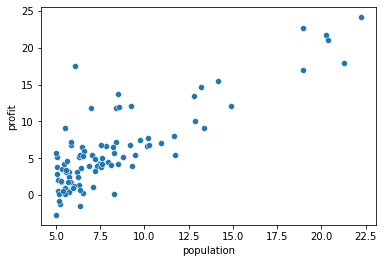

In [6]:
#drow data 
sas.scatterplot(df['population'],df['profit'])

In [5]:
#add new columns called ones 
df.insert(0,'ones',1)
df.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### sperate x (training data ) from y(target variable)

In [7]:
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

print('x data \n',x.head(5))

print('y data \n',y.head(5))

x data 
    ones  population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
y data 
     profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


### convert from data frames to metrices

In [8]:
X=np.matrix(x.values)
Y=np.matrix(y.values)
theata=np.matrix(np.array([0,0]))
print('x: \n',X)
print('shape :',X.shape)
print('=============')
print('y: \n',Y)
print('shape :',Y.shape)
print('=============')
print('theata : \n',theata)

x: 
 [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.  

### cost function

In [9]:
def Cost(X, y, theta):
    """
    Cost function is the calculation of the error
    between predicted values and actual values,
    represented as a single real number.
    """
    z = np.power(((X * theta.T) - y), 2)
    #print('z \n',z)
    #print('m ' ,len(X))
    return np.sum(z) / (2 * len(X))


print('cost (x,y,theata ) =',Cost(X,Y,theata))



cost (x,y,theata ) = 32.072733877455676


### GD function 

In [17]:
def gd(X,Y,theata,alpha,iters):
    temp=np.matrix(np.zeros(theata.shape))  #[0,0]
    parameters=int(theata.ravel().shape[1]) # we have tow parameters 
    cost=np.zeros(iters) 
    for i in range(iters):
        error=(X*theata.T)-Y
        for j in range(parameters): # j=0 or j=1 
            term=np.multiply(error,X[:,j])
            temp[0,j]=theata[0,j]-((alpha/len(X)*np.sum(term)))
        theata=temp
        cost[i]=Cost(X,Y,theata)
    return theata , cost


### perform gradient descent to fit the model 

In [37]:
# initialize variables for learning rate and iterations
alpha=0.00001
iters=1000000
g,cost=gd(X,Y,theata,alpha,iters)  

print('g= ',g)
print('cost',cost)
print('Cost : ' ,Cost(X,y,g))


g=  [[-3.24033791  1.12718729]]
cost [32.02973202 31.98680084 31.94394022 ...  4.51608269  4.51608255
  4.51608241]
Cost :  profit    4.516082
dtype: float64


###  Best fit line 

In [38]:
x=np.linspace(df.population.min(),df.population.max(),1000)
#print('x:\n',x)
f=g[0,0]+(g[0,1]*x) 
#print('f:\n',f)



### drow line

Text(0.5, 1.0, 'prediction profit vs. poplation size')

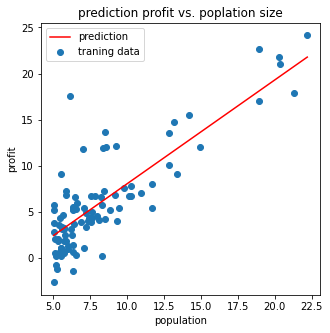

In [39]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='prediction')
ax.scatter(df.population,df.profit,label='traning data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('prediction profit vs. poplation size')

### drow error graph

Text(0.5, 1.0, ' Error vs training data ')

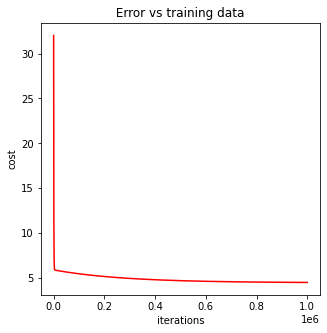

In [40]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title(' Error vs training data ')